In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

In [ ]:
data = pd.read_csv("gas_final.csv")

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274628 entries, 0 to 274627
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   address               274628 non-null  float64
 1   function              274628 non-null  float64
 2   length                274628 non-null  float64
 3   setpoint              64100 non-null   float64
 4   gain                  64100 non-null   float64
 5   reset rate            64100 non-null   float64
 6   deadband              64100 non-null   float64
 7   cycle time            64100 non-null   float64
 8   rate                  64100 non-null   float64
 9   system mode           64100 non-null   float64
 10  control scheme        64100 non-null   float64
 11  pump                  64100 non-null   float64
 12  solenoid              64100 non-null   float64
 13  pressure measurement  68888 non-null   float64
 14  crc rate              274628 non-null  float64
 15  

In [ ]:
numeric_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')

In [ ]:
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = data.select_dtypes(include=['object']).columns

In [ ]:
print("\nNumeric Columns:", numeric_columns)
print("Categorical Columns:", categorical_columns)



Numeric Columns: Index(['address', 'function', 'length', 'setpoint', 'gain', 'reset rate',
       'deadband', 'cycle time', 'rate', 'system mode', 'control scheme',
       'pump', 'solenoid', 'pressure measurement', 'crc rate', 'time'],
      dtype='object')
Categorical Columns: Index(['command response', 'binary result', 'categorized result',
       'specific result'],
      dtype='object')


In [ ]:
if not numeric_columns.empty:
    data[numeric_columns] = numeric_imputer.fit_transform(data[numeric_columns])
if not categorical_columns.empty:
    data[categorical_columns] = categorical_imputer.fit_transform(data[categorical_columns])


In [ ]:
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [ ]:
scaler = StandardScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

In [ ]:
features = data.drop(columns=['categorized result'])
target = data['categorized result']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.3, random_state=42, stratify=target
)

In [ ]:
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

### Alternate method

In [ ]:
# # Select the target column based on the paper or user choice
# target_column = 'categorized result'  # Replace with 'binary result' or 'specific result' if needed

# # Validate the selected target column
# if target_column not in data.columns:
#     raise ValueError(f"Target column '{target_column}' not found in the dataset.")

# # Update the features and target based on the chosen column
# features = data.drop(columns=['binary result', 'categorized result', 'specific result'])
# target = data[target_column]

# # Preprocessing remains the same (imputation, encoding, and scaling)
# numeric_columns = features.select_dtypes(include=['float64', 'int64']).columns
# categorical_columns = features.select_dtypes(include=['object']).columns

# # Impute missing values
# if not numeric_columns.empty:
#     features[numeric_columns] = numeric_imputer.fit_transform(features[numeric_columns])
# if not categorical_columns.empty:
#     features[categorical_columns] = categorical_imputer.fit_transform(features[categorical_columns])

# # Encode Categorical Variables
# label_encoders = {}
# for col in categorical_columns:
#     le = LabelEncoder()
#     features[col] = le.fit_transform(features[col])
#     label_encoders[col] = le

# # Feature Scaling
# features[numeric_columns] = scaler.fit_transform(features[numeric_columns])

# # Train-Test Split
# X_train, X_test, y_train, y_test = train_test_split(
#     features, target, test_size=0.3, random_state=42, stratify=target
# )

**Using Randomforest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Step 1: Define the Model
# Using RandomForestClassifier as an example
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Step 2: Train the Model
print("Training Random Forest Classifier...")
rf_model.fit(X_train, y_train)

# Step 3: Make Predictions
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

Training Random Forest Classifier...


Evaluate model

In [ ]:
print("\nClassification Report (Training Data):")
print(classification_report(y_train, y_train_pred))

print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_test_pred))


Classification Report (Training Data):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    150206
           1       1.00      1.00      1.00      5427
           2       1.00      1.00      1.00      9124
           3       1.00      1.00      1.00      5530
           4       1.00      1.00      1.00     14288
           5       1.00      1.00      1.00      3429
           6       1.00      1.00      1.00      1523
           7       1.00      1.00      1.00      2712

    accuracy                           1.00    192239
   macro avg       1.00      1.00      1.00    192239
weighted avg       1.00      1.00      1.00    192239


Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     64374
           1       0.48      0.34      0.40      2326
           2       0.58      0.52      0.55      3911
           3       0.98      0.97      0.97      2370
  

Confusion Matrix


Confusion Matrix (Training Data):


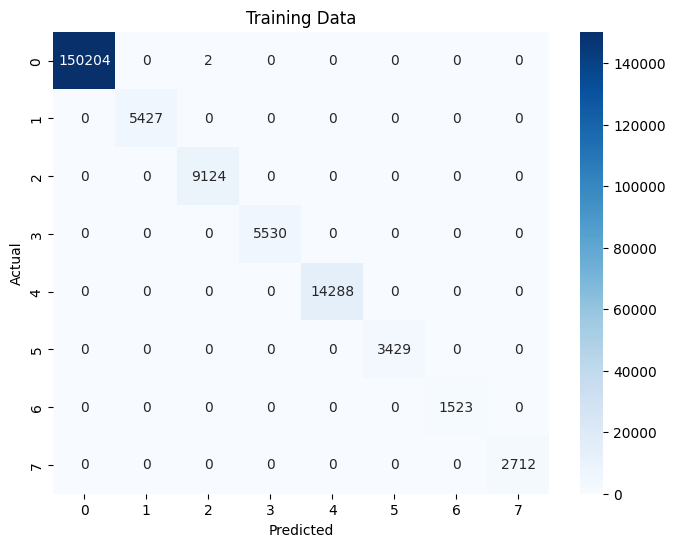


Confusion Matrix (Test Data):


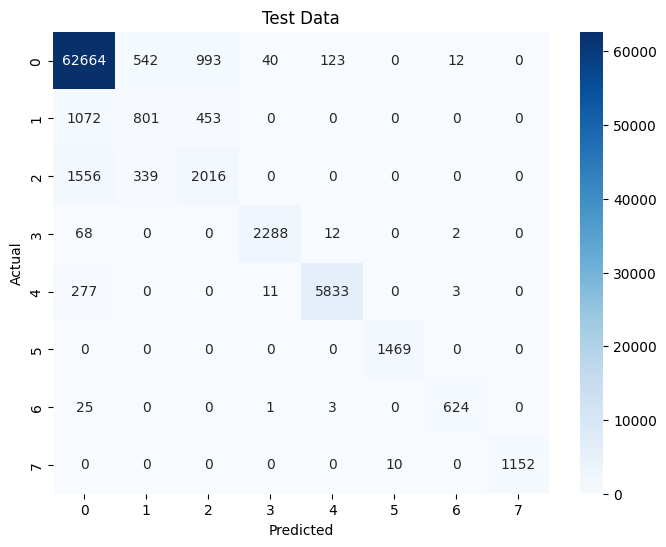

In [ ]:
def plot_confusion_matrix(y_true, y_pred, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

print("\nConfusion Matrix (Training Data):")
plot_confusion_matrix(y_train, y_train_pred, title="Training Data")

print("\nConfusion Matrix (Test Data):")
plot_confusion_matrix(y_test, y_test_pred, title="Test Data")

Festure importance


Feature Importance:
                 Feature  Importance
16                  time    0.335827
14              crc rate    0.177664
1               function    0.129130
2                 length    0.122439
13  pressure measurement    0.064171
15      command response    0.028216
4                   gain    0.018249
3               setpoint    0.017420
8                   rate    0.017382
5             reset rate    0.017085
9            system mode    0.016839
7             cycle time    0.015577
11                  pump    0.012579
6               deadband    0.012501
10        control scheme    0.006180
12              solenoid    0.004505
0                address    0.004238


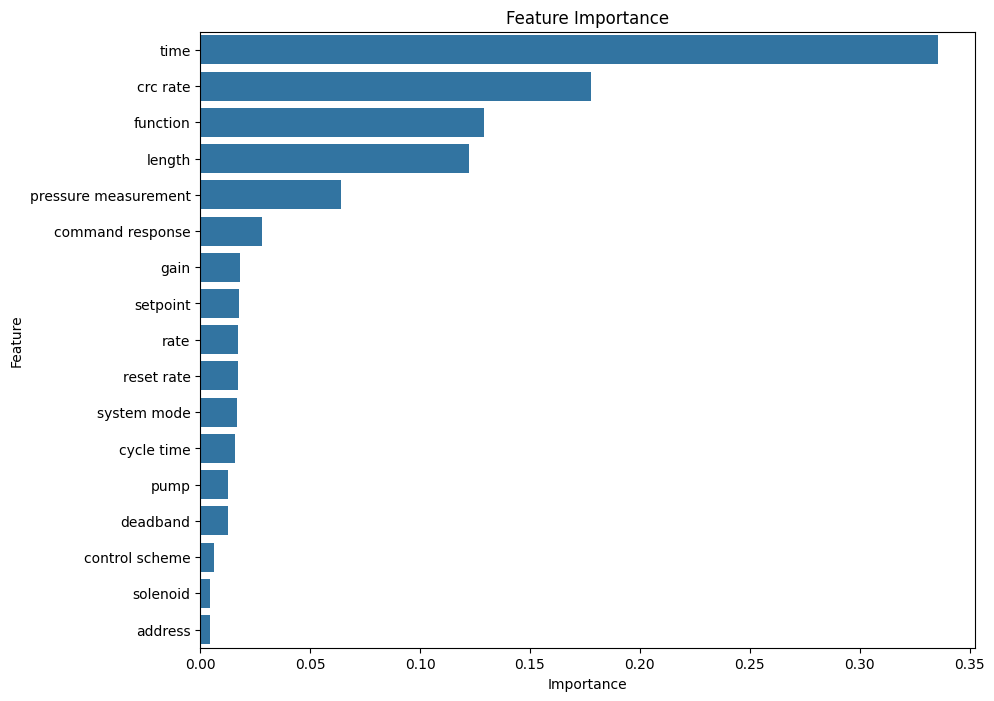

In [ ]:
# Random Forest, to inspect feature importance
feature_importance = pd.DataFrame({
    'Feature': features.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

# Optional: Visualize Feature Importance
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title("Feature Importance")
plt.show()

**Alternate method using Neural network**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Neural Network Model
def create_nn(input_dim, neurons):
    model = Sequential([
        Dense(neurons[0], activation='relu', input_dim=input_dim),
        Dropout(0.3),
        Dense(neurons[1], activation='relu'),
        Dropout(0.3),
        Dense(neurons[2], activation='relu'),
        Dropout(0.3),
        Dense(len(np.unique(y_train)), activation='softmax')  # Multi-class classification
    ])
    optimizer = Adam(learning_rate=1e-3)  # Learning rate can be tuned
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

Compile and train model

In [ ]:
nn_model = create_nn(input_dim=X_train.shape[1], neurons=[64, 32, 16])

# Step 3: Train the Model
print("Training Neural Network...")
history = nn_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=128,
    verbose=1
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training Neural Network...
Epoch 1/50
1502/1502 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7357 - loss: 1.0138 - val_accuracy: 0.8268 - val_loss: 0.5122
Epoch 2/50
1502/1502 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8192 - loss: 0.5635 - val_accuracy: 0.8346 - val_loss: 0.4901
Epoch 3/50
1502/1502 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8258 - loss: 0.5274 - val_accuracy: 0.8404 - val_loss: 0.4796
Epoch 4/50
1502/1502 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8283 - loss: 0.5118 - val_accuracy: 0.8399 - val_loss: 0.4749
Epoch 5/50
1502/1502 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8320 - loss: 0.5037 - val_accuracy: 0.8401 - val_loss: 0.4697
Epoch 6/50
1502/1502 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8349 - loss: 0.4951 - val_accuracy: 0.8439 - val_loss: 0.4658
Epoch 7/50
1502/1502 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8367 - loss: 0.4909 - val_accuracy: 0.8443 - val_loss: 0.4617
Epoch 8/50
1502/1502 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accura

Evaluate model

In [ ]:
train_loss, train_acc = nn_model.evaluate(X_train, y_train, verbose=0)
test_loss, test_acc = nn_model.evaluate(X_test, y_test, verbose=0)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

Training Accuracy: 0.8494
Test Accuracy: 0.8493


Generate predictions

In [ ]:
y_train_pred = nn_model.predict(X_train).argmax(axis=1)
y_test_pred = nn_model.predict(X_test).argmax(axis=1)

6008/6008 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step
2575/2575 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


In [ ]:
# Step 6: Evaluate Predictions
print("\nClassification Report (Training Data):")
print(classification_report(y_train, y_train_pred))

print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_test_pred))


Classification Report (Training Data):


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

              precision    recall  f1-score   support

           0       0.84      1.00      0.91    150206
           1       0.00      0.00      0.00      5427
           2       0.97      0.02      0.05      9124
           3       0.98      0.24      0.38      5530
           4       1.00      0.41      0.58     14288
           5       0.77      1.00      0.87      3429
           6       1.00      0.43      0.60      1523
           7       1.00      0.62      0.77      2712

    accuracy                           0.85    192239
   macro avg       0.82      0.46      0.52    192239
weighted avg       0.84      0.85      0.80    192239


Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.84      1.00      0.92     64374
           1       0.00      0.00      0.00      2326
           2       0.94      0.03      0.05      3911
           3       0.98      0.23      0.37      2370
           4       1.00      0.41      0.5

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Confusion Matrix


Confusion Matrix (Training Data):


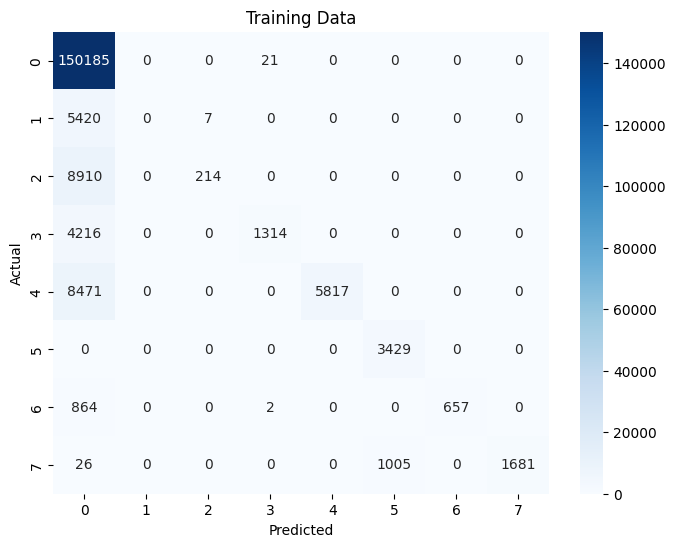


Confusion Matrix (Test Data):


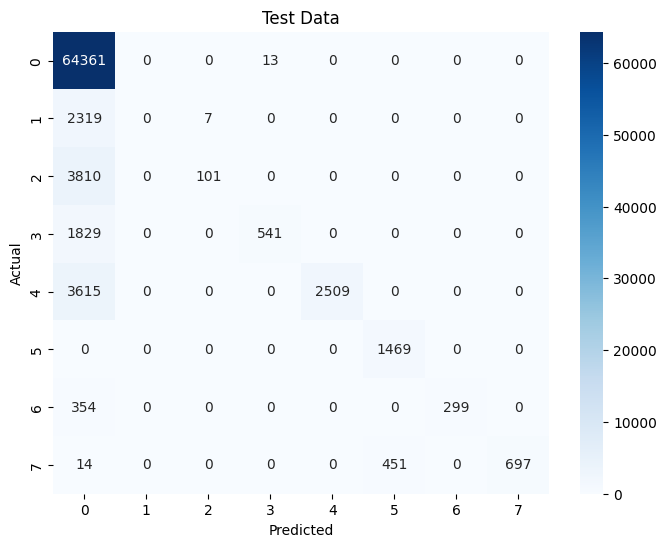

In [ ]:
def plot_confusion_matrix(y_true, y_pred, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

print("\nConfusion Matrix (Training Data):")
plot_confusion_matrix(y_train, y_train_pred, title="Training Data")

print("\nConfusion Matrix (Test Data):")
plot_confusion_matrix(y_test, y_test_pred, title="Test Data")

Plot Training History

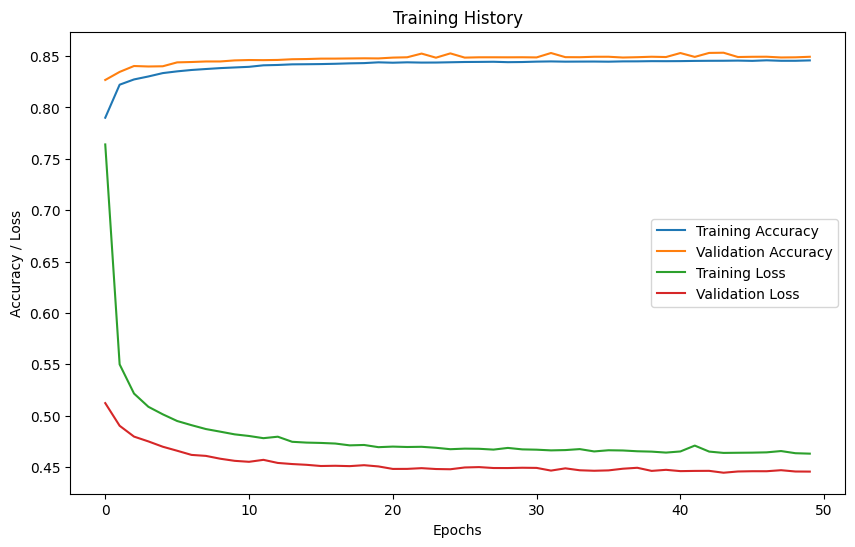

In [ ]:
def plot_training_history(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy / Loss')
    plt.title('Training History')
    plt.legend()
    plt.show()

plot_training_history(history)

**Stacked deep learning model**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Define a Function to Create a Model
def create_nn(input_dim, neurons):
    model = Sequential([
        Dense(neurons[0], activation='relu', input_dim=input_dim),
        Dropout(0.3),
        Dense(neurons[1], activation='relu'),
        Dropout(0.3),
        Dense(neurons[2], activation='relu'),
        Dropout(0.3),
        Dense(len(np.unique(y_train)), activation='softmax')  # Multi-class classification
    ])
    optimizer = Adam(learning_rate=1e-3)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

Train Multiple Models

In [ ]:
# Define architectures for stacking
architectures = [
    [64, 32, 16],
    [128, 64, 32],
    [32, 16, 8]
]

models = []
for arch in architectures:
    print(f"Training model with architecture: {arch}")
    model = create_nn(input_dim=X_train.shape[1], neurons=arch)
    model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=50,
        batch_size=128,
        verbose=1
    )
    models.append(model)

Training model with architecture: [64, 32, 16]
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1502/1502 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7080 - loss: 1.0781 - val_accuracy: 0.8287 - val_loss: 0.5164
Epoch 2/50
1502/1502 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8215 - loss: 0.5681 - val_accuracy: 0.8346 - val_loss: 0.4944
Epoch 3/50
1502/1502 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8270 - loss: 0.5296 - val_accuracy: 0.8374 - val_loss: 0.4839
Epoch 4/50
1502/1502 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8313 - loss: 0.5146 - val_accuracy: 0.8425 - val_loss: 0.4748
Epoch 5/50
1502/1502 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8340 - loss: 0.5054 - val_accuracy: 0.8435 - val_loss: 0.4701
Epoch 6/50
1502/1502 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8378 - loss: 0.4946 - val_accuracy: 0.8441 - val_loss: 0.4657
Epoch 7/50
1502/1502 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8388 - loss: 0.4876 - val_accuracy: 0.8446 - val_loss: 0.4652
Epoch 8/50
1502/1502 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8378 - loss: 0.4915 - val_accura

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1502/1502 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7838 - loss: 0.8063 - val_accuracy: 0.8363 - val_loss: 0.4891
Epoch 2/50
1502/1502 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8332 - loss: 0.5108 - val_accuracy: 0.8424 - val_loss: 0.4720
Epoch 3/50
1502/1502 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8386 - loss: 0.4888 - val_accuracy: 0.8436 - val_loss: 0.4659
Epoch 4/50
1502/1502 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8396 - loss: 0.4815 - val_accuracy: 0.8456 - val_loss: 0.4603
Epoch 5/50
1502/1502 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8424 - loss: 0.4726 - val_accuracy: 0.8464 - val_loss: 0.4592
Epoch 6/50
1502/1502 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8440 - loss: 0.4685 - val_accuracy: 0.8467 - val_loss: 0.4554
Epoch 7/50
1502/1502 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8445 - loss: 0.4648 - val_accuracy: 0.8475 - val_loss: 0.4507
Epoch 8/50
1502/1502 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8457 - loss: 0.4607 - val_accura

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1502/1502 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7226 - loss: 1.1580 - val_accuracy: 0.8157 - val_loss: 0.5788
Epoch 2/50
1502/1502 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8036 - loss: 0.6527 - val_accuracy: 0.8214 - val_loss: 0.5328
Epoch 3/50
1502/1502 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8098 - loss: 0.5956 - val_accuracy: 0.8243 - val_loss: 0.5173
Epoch 4/50
1502/1502 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8093 - loss: 0.5786 - val_accuracy: 0.8259 - val_loss: 0.5100
Epoch 5/50
1502/1502 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8156 - loss: 0.5570 - val_accuracy: 0.8277 - val_loss: 0.5049
Epoch 6/50
1502/1502 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8148 - loss: 0.5559 - val_accuracy: 0.8269 - val_loss: 0.5006
Epoch 7/50
1502/1502 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8167 - loss: 0.5494 - val_accuracy: 0.8278 - val_loss: 0.4990
Epoch 8/50
1502/1502 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8166 - loss: 0.5461 - val_accurac

In [ ]:
# Step 3: Combine Predictions
def stacked_model_predict(models, X):
    predictions = np.zeros((X.shape[0], len(models), len(np.unique(y_train))))
    for i, model in enumerate(models):
        predictions[:, i, :] = model.predict(X)  # Probability predictions from each model
    # Average the probabilities across all models
    return np.mean(predictions, axis=1)

# Predictions on training and test sets
y_train_pred_prob = stacked_model_predict(models, X_train)
y_test_pred_prob = stacked_model_predict(models, X_test)

# Convert probabilities to class predictions
y_train_pred = np.argmax(y_train_pred_prob, axis=1)
y_test_pred = np.argmax(y_test_pred_prob, axis=1)

6008/6008 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step
6008/6008 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step
6008/6008 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step
2575/2575 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
2575/2575 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
2575/2575 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


In [ ]:
# Step 4: Evaluate the Stacked Model
print("\nClassification Report (Training Data):")
print(classification_report(y_train, y_train_pred))

print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_test_pred))


Classification Report (Training Data):


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

              precision    recall  f1-score   support

           0       0.84      1.00      0.91    150206
           1       0.00      0.00      0.00      5427
           2       0.96      0.02      0.05      9124
           3       0.99      0.24      0.38      5530
           4       1.00      0.41      0.58     14288
           5       0.92      1.00      0.96      3429
           6       1.00      0.43      0.60      1523
           7       1.00      0.88      0.94      2712

    accuracy                           0.85    192239
   macro avg       0.84      0.50      0.55    192239
weighted avg       0.85      0.85      0.81    192239


Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.84      1.00      0.92     64374
           1       0.00      0.00      0.00      2326
           2       0.94      0.03      0.05      3911
           3       0.99      0.23      0.37      2370
           4       1.00      0.41      0.5

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Confusion Matrix (Training Data):


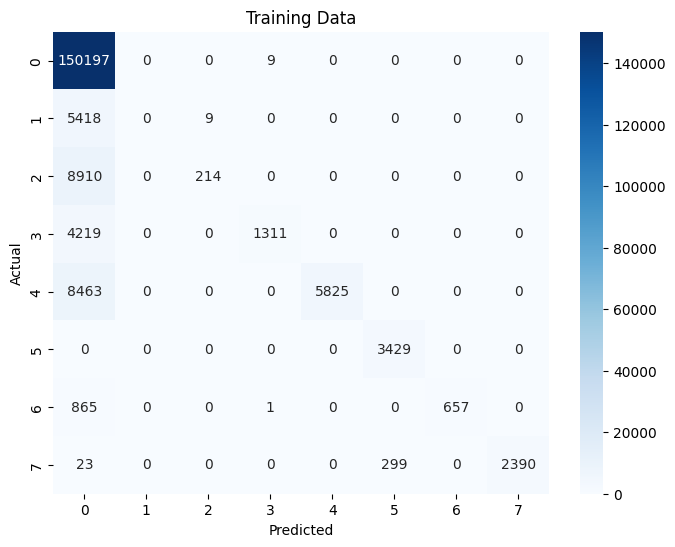


Confusion Matrix (Test Data):


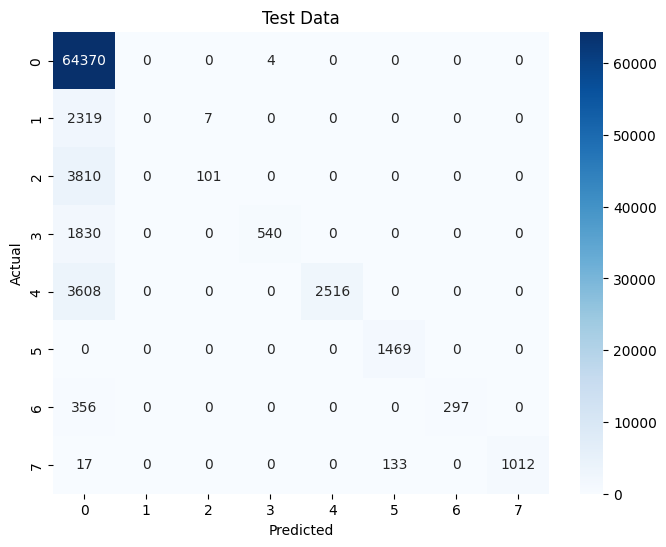

In [ ]:
# Step 5: Plot Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

print("\nConfusion Matrix (Training Data):")
plot_confusion_matrix(y_train, y_train_pred, title="Training Data")

print("\nConfusion Matrix (Test Data):")
plot_confusion_matrix(y_test, y_test_pred, title="Test Data")

In [ ]:
from sklearn.linear_model import LogisticRegression

# Prepare meta-model input
train_meta_features = np.hstack([model.predict(X_train) for model in models])
test_meta_features = np.hstack([model.predict(X_test) for model in models])

# Train meta-model
meta_model = LogisticRegression()
meta_model.fit(train_meta_features, y_train)

# Predict using meta-model
y_test_pred = meta_model.predict(test_meta_features)
print("\nMeta-Model Classification Report (Test Data):")
print(classification_report(y_test, y_test_pred))


6008/6008 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step
6008/6008 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step
6008/6008 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
2575/2575 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
2575/2575 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
2575/2575 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step

Meta-Model Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.85      1.00      0.92     64374
           1       0.00      0.00      0.00      2326
           2       0.93      0.03      0.05      3911
           3       0.91      0.31      0.46      2370
           4       0.99      0.42      0.59      6124
           5       0.92      1.00      0.96      1469
           6       1.00      0.46      0.63       653
           7       1.00      0.88      0.94      1162

    accuracy                           0.86     82389
   macro avg       0.82      0.51      0.57     82389
weighted avg       0.84      0.86      0.81     82389



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
